## Analysis 3 : EMA - Exponential Moving Average 
- What is EMA?
    - "An exponential moving average (EMA) is a type of moving average that is similar to a simple moving average, except that more weight is given to the latest data. It's also known as the exponentially weighted moving average. This type of moving average reacts faster to recent price changes than a simple moving average."(investopedia.com)
- DIF = EMA(close, 12) - EMA(close, 26)
- DEM = EMA(DIF, 9)
- MACD = (DIF - DEM) * 2

In [133]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

In [134]:
# Read downloaded data
p = Path(os.getcwd())
path = str(p.parent) + '/data/AAPL/AAPL.csv'
df = pd.read_csv(path)

In [135]:
df = df[df.apply(lambda x: int(x['Date'].split('-')[0]) >= 2017, axis=1)]
df = df[df['Volume'] != 0]
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())
df = df.reindex(index=df.index[::-1])

In [136]:
EMA_Days = [5, 10, 20]
for em in EMA_Days:
    df['EMA '+str(em)] = Series.ewm(df['Adj_Close'], span=em).mean()
#df.tail()

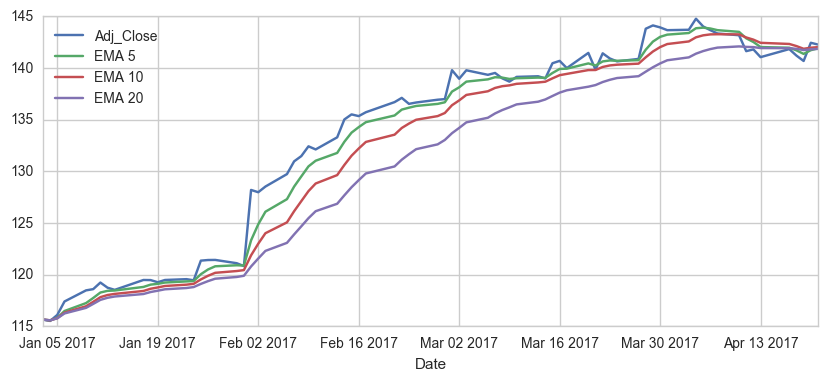

In [137]:
df = df.set_index('Date')
df[['Adj_Close','EMA 5','EMA 10','EMA 20']].plot(subplots=False,figsize=(10,4))
plt.savefig('ana_3_output/EMA.png')

In [138]:
params = [12, 26]
for p in params:
    df['EMA '+str(p)] = Series.ewm(df['Adj_Close'], span=p).mean()
df['DIF'] = df['EMA 12'] - df['EMA 26']
df['DEM'] = Series.ewm(df['DIF'], span=9).mean()
df['MACD'] = (df['DIF'] - df['DEM']) * 2
#df = df[df['Date'] >= datetime.date( 2015, 12, 1 )]

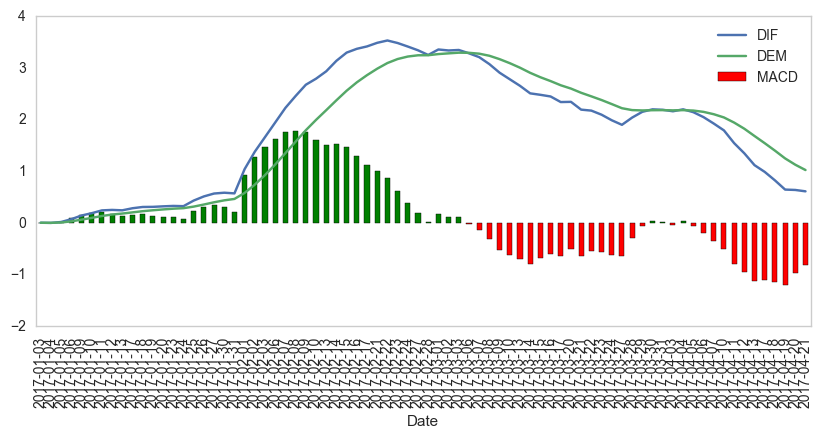

In [139]:
fig, ax = plt.subplots()
df[['DIF','DEM']].plot(kind='line',figsize=(10,4), ax=ax, use_index=False, grid=False)
df[['MACD']].plot(kind='bar', ax=ax, color=['g' if x[-1] > 0 else 'r' for x in df.itertuples()], grid=False)
plt.savefig('ana_3_output/DIF+DEM+MACD.png')